In [1]:
import pandas as pd
import plotly.graph_objects as go
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

file_path = "export_result_oct21.xlsx"

months = [
    "Dec23","Jan24","Feb24","Mar24","Apr24","May24",
    "Jun24","Jul24","Aug24","Sep24","Oct24","Nov24"
]

xl = pd.ExcelFile(file_path)

for sheet in months:
    df = pd.read_excel(xl, sheet_name=sheet)

    # === TABLE 1 === (A–E → columns 0:5, dynamic length)
    # Detect where table 2 starts ("food_items" in col A)
    food_start = df.index[df.iloc[:, 0].astype(str).str.lower().eq("food_items")]
    if len(food_start) > 0:
        end_t1 = food_start[0]
    else:
        end_t1 = len(df)
    table1 = df.iloc[:end_t1, 0:5].dropna(how="all")

    # === TABLE 2 === (A–D → columns 0:4, starts at "food_items")
    if len(food_start) > 0:
        start_t2 = food_start[0]
        # find next blank row to determine end
        after = df.iloc[start_t2+1:, 0].isna()
        if after.any():
            end_t2 = after.idxmax()
        else:
            end_t2 = len(df)
        table2 = df.iloc[start_t2:end_t2, 0:4].dropna(how="all")
        table2.drop(table2.index[0], inplace=True)
    else:
        table2 = pd.DataFrame()
        table2.drop(table2.index[0], inplace=True)
        
    if table2.shape[1] == 4:
        table2.columns = ['food_items', 'quantity', 'sum_of_portionunitstandard_g', 'sum_of_portionunitstandard_kg']
       
    
    # === ANIMAL & SUMMARY (H–L: cols 7–12) ===
    animal = df.iloc[0:17, 7:12].dropna(how="all")
    animal_name = ['food_items', 'quantity', 'sum_of_portionunitstandard_g',
       'gwp_of_1_kg_food', 'gwp_x_kg']
    animal.columns = animal_name
    
    summary = df.iloc[18:23, 7:12].dropna(how="all")
    summary_name = ['variables', 'mass_kg', 'percentage_kg', 'gwp_total', 'percentage_gwp']
    summary.columns = summary_name

    # === ANIMAL_S & SUMMARY_S (O–S: cols 14–19) ===
    animal_s = df.iloc[0:17, 14:19].dropna(how="all")
    animal_s.columns = animal_name
    summary_s = df.iloc[18:23, 14:19].dropna(how="all")
    summary_s.columns = summary_name

    # === DROP completely empty columns (in case of blanks)
    table1 = table1.dropna(axis=1, how="all")
    table2 = table2.dropna(axis=1, how="all")
    if table2.shape[1] == 3:
        table2.columns = ['food_items', 'sum_of_portionunitstandard_g', 'sum_of_portionunitstandard_kg']
        #print(sheet)

    # === Assign to variables dynamically ===
    suffix = sheet[:3].lower()  # e.g., dec, jan, feb
    globals()[f"{suffix}_table1"]   = table1
    globals()[f"{suffix}_table2"]   = table2
    globals()[f"{suffix}_animal"]   = animal
    globals()[f"{suffix}_summary"]  = summary
    globals()[f"{suffix}_animal_s"] = animal_s
    globals()[f"{suffix}_summary_s"]= summary_s

    #print(f"✅ Extracted all tables for {sheet}")

print("All months processed and loaded into variables.")

All months processed and loaded into variables.


In [3]:
month_tables = {
    "Dec": dec_table1,
    "Jan": jan_table1,
    "Feb": feb_table1,
    "Mar": mar_table1,
    "Apr": apr_table1,
    "May": may_table1,
    "Jun": jun_table1,
    "Jul": jul_table1,
    "Aug": aug_table1,
    "Sep": sep_table1,
    "Oct": oct_table1,
    "Nov": nov_table1
}

# Step 2. Add month to each table and combine
df_list = []
for month, df in month_tables.items():
    temp = df.copy()
    temp["Month"] = month
    df_list.append(temp)

monthly_df = pd.concat(df_list, ignore_index=True)

# Step 3. Order months
month_order = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
monthly_df["Month"] = pd.Categorical(monthly_df["Month"], categories=month_order, ordered=True)


In [3]:
def plot_food(food_name, value_column):
    df = monthly_df[monthly_df["food_items"] == food_name].copy()
    
    plt.figure(figsize=(8,3))
    plt.bar(df["Month"], df[value_column], width=0.6, color='g')
    plt.title(f"{food_name} over months")
    plt.ylabel(value_column)
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



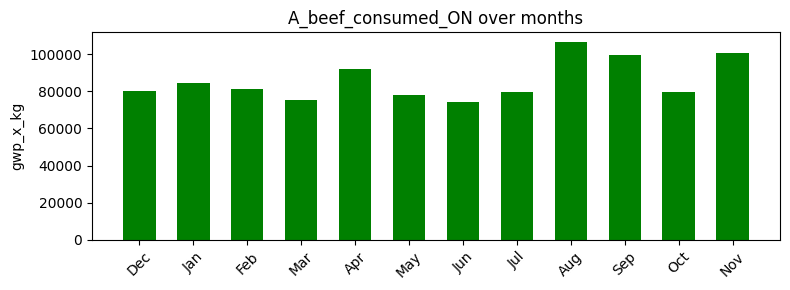

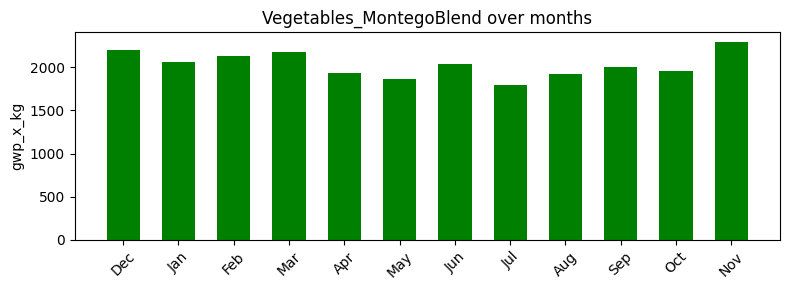

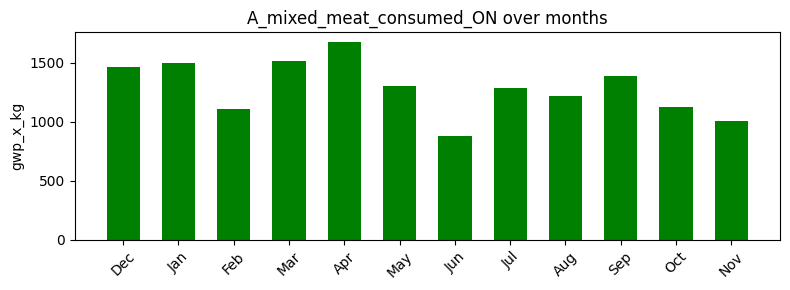

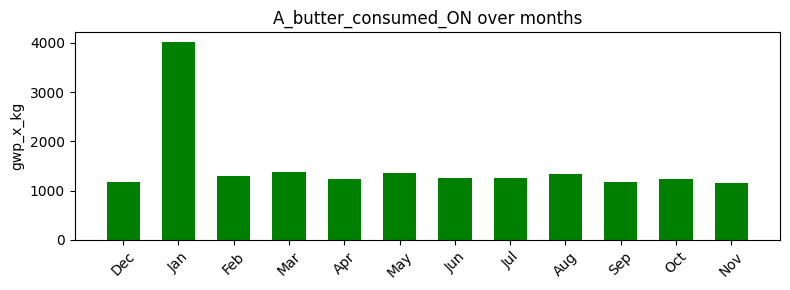

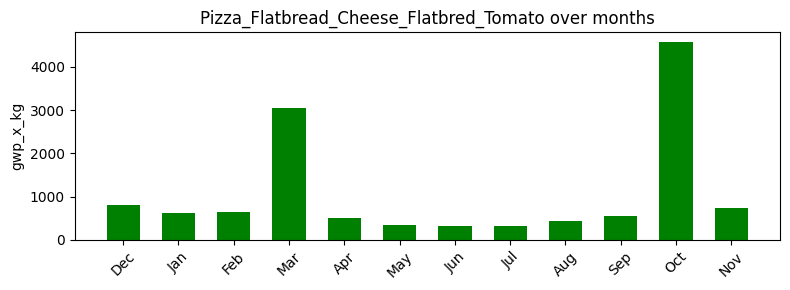

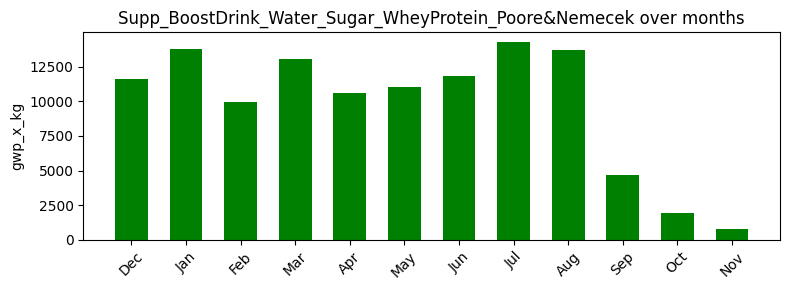

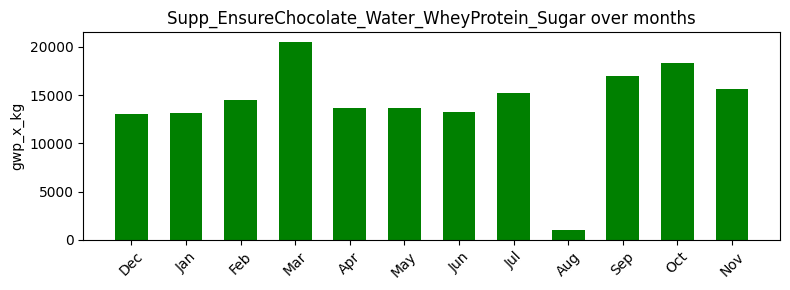

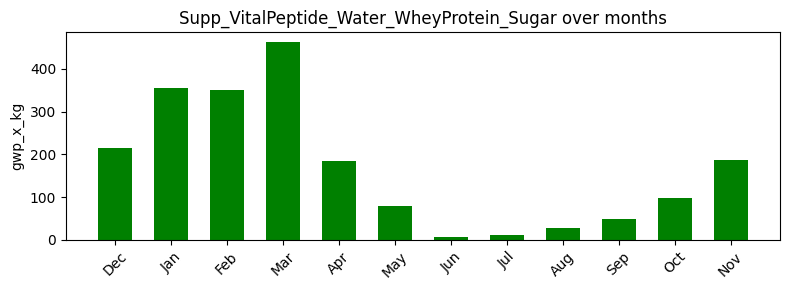

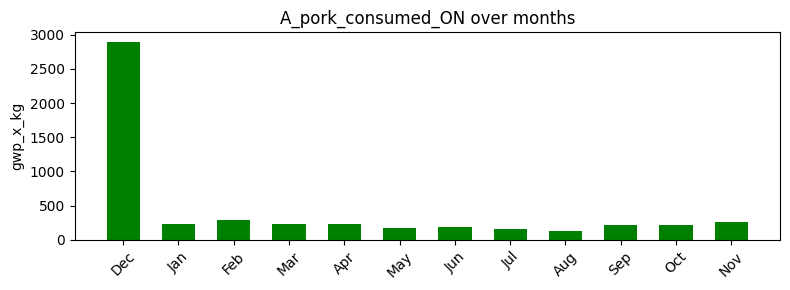

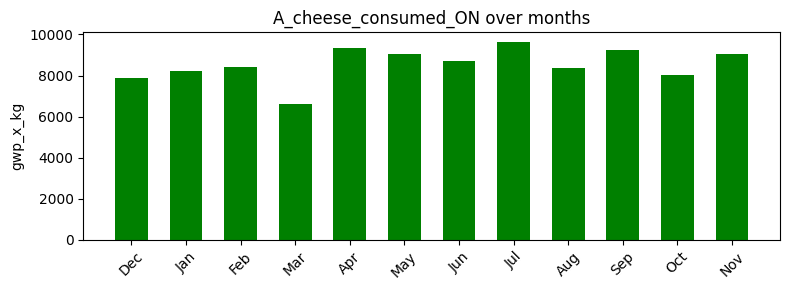

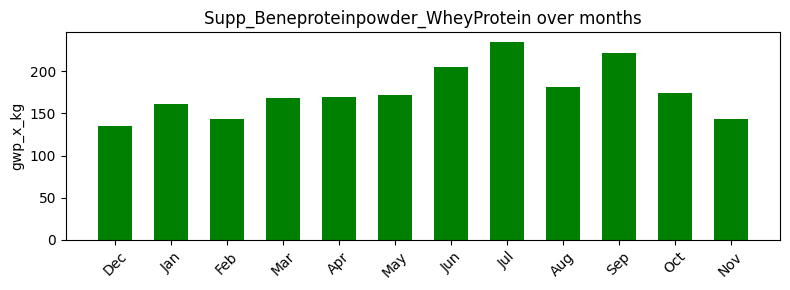

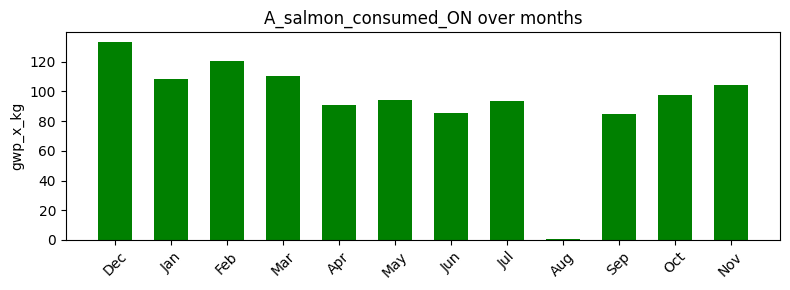

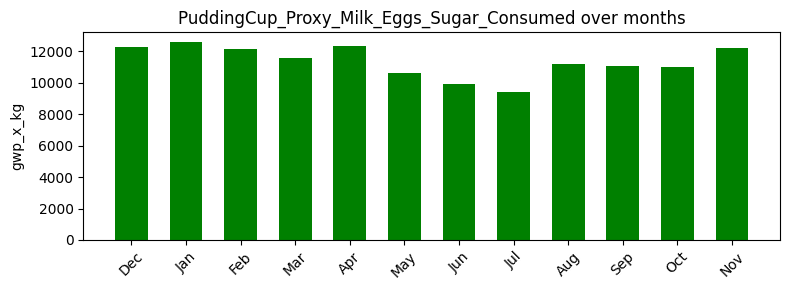

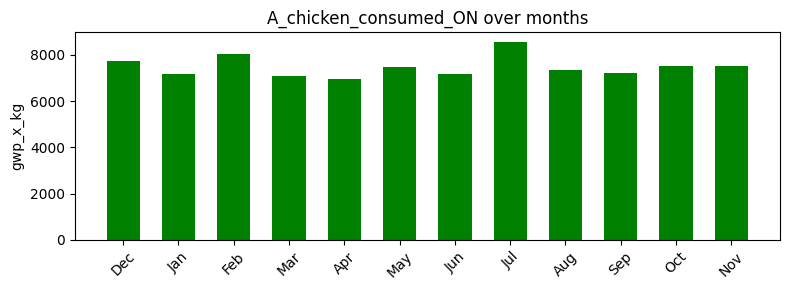

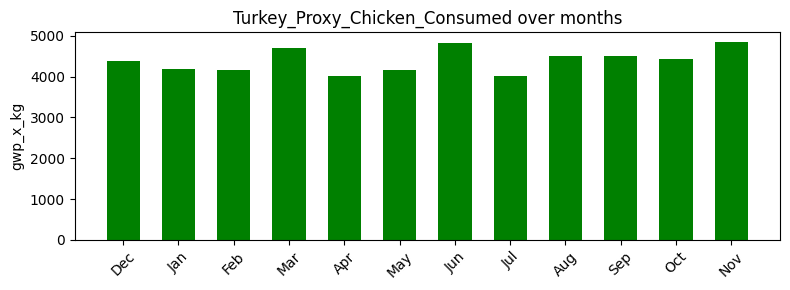

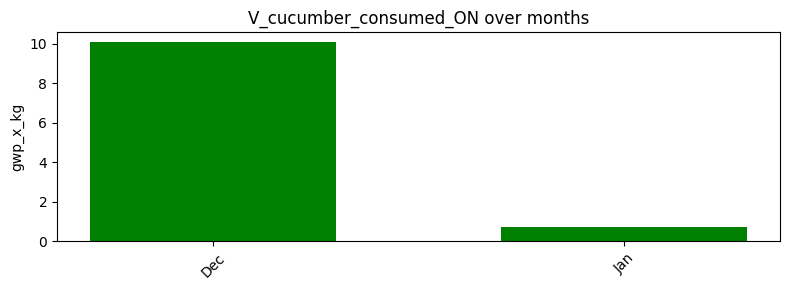

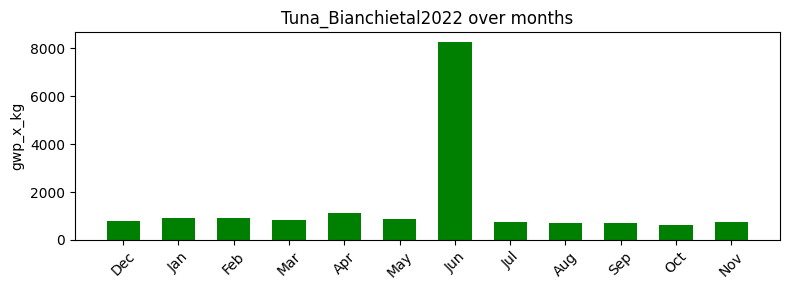

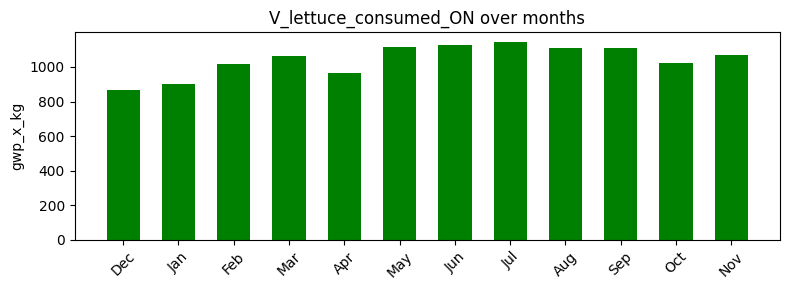

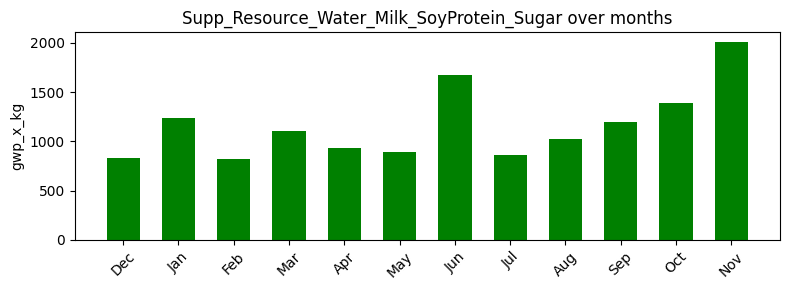

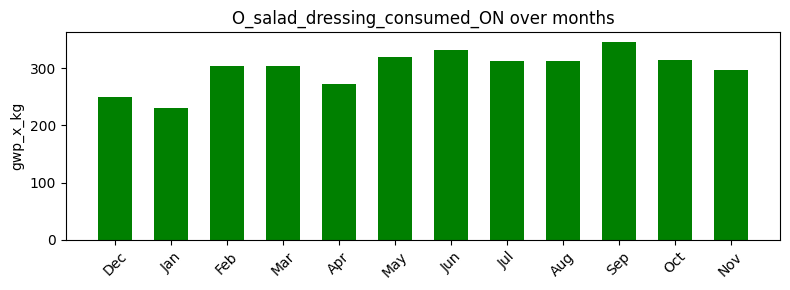

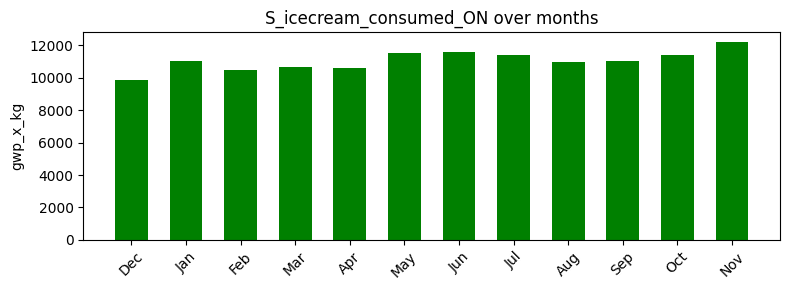

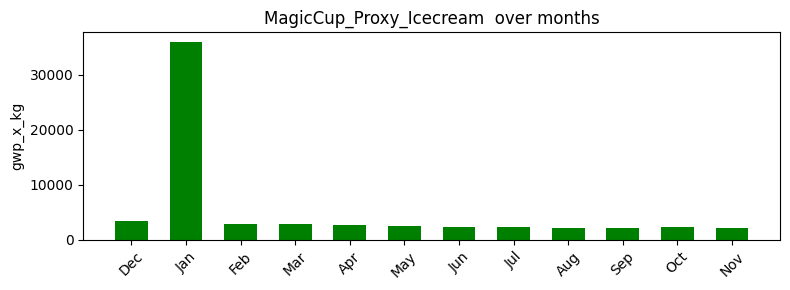

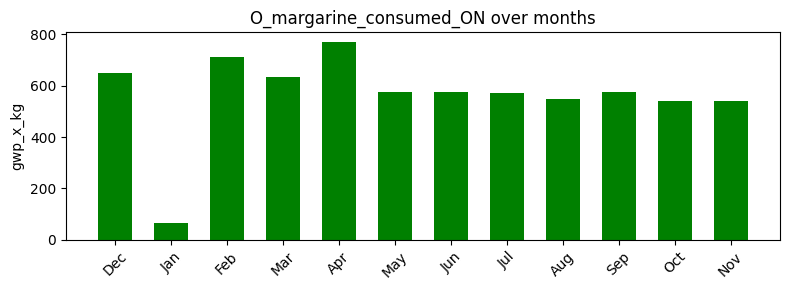

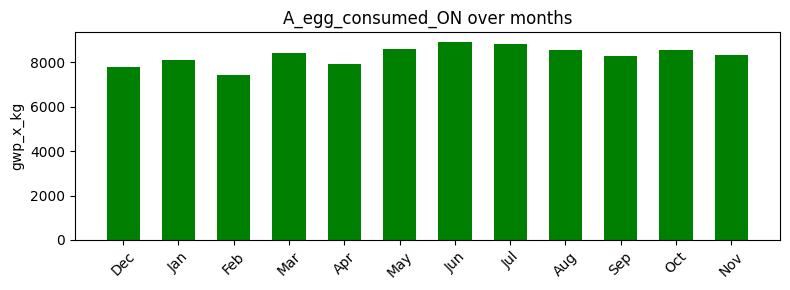

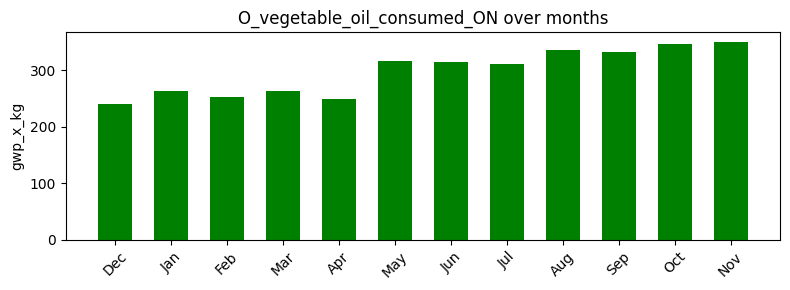

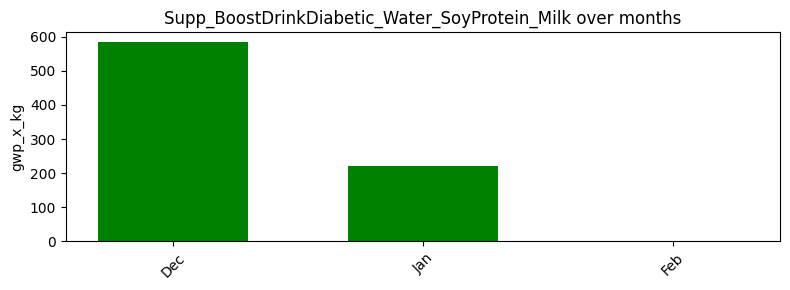

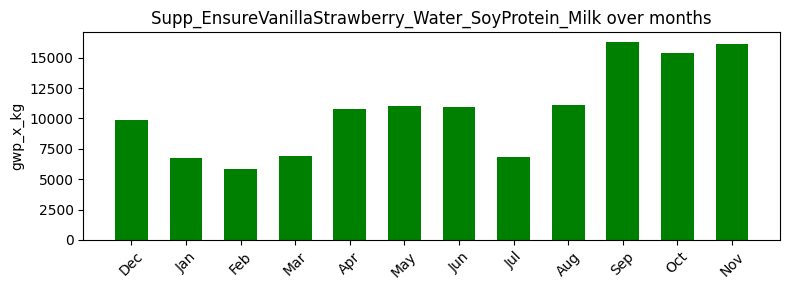

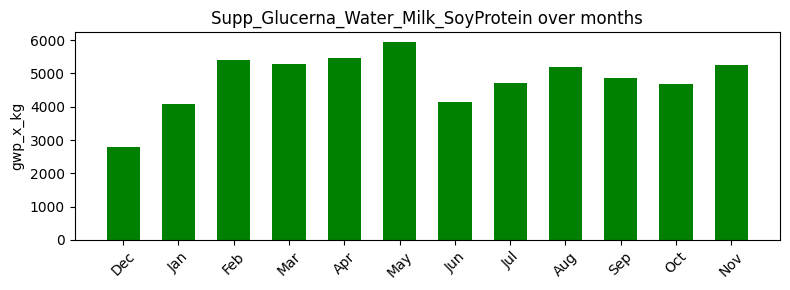

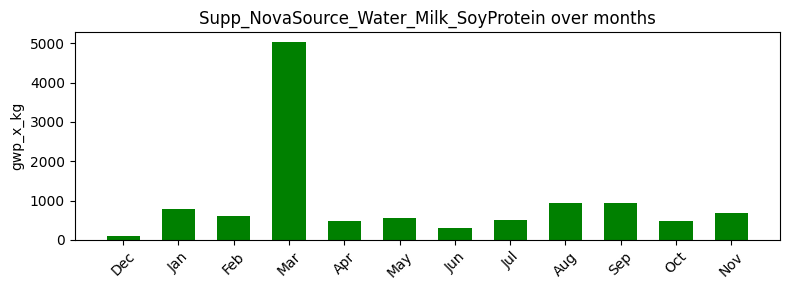

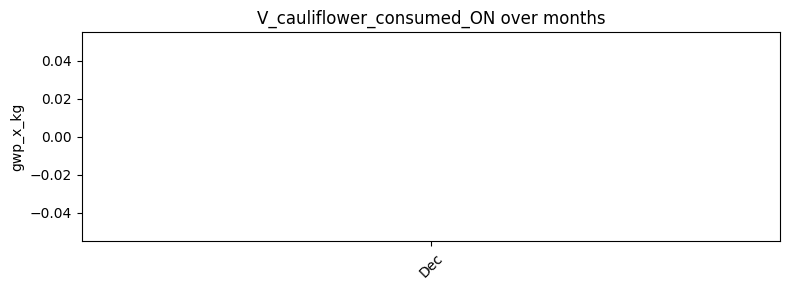

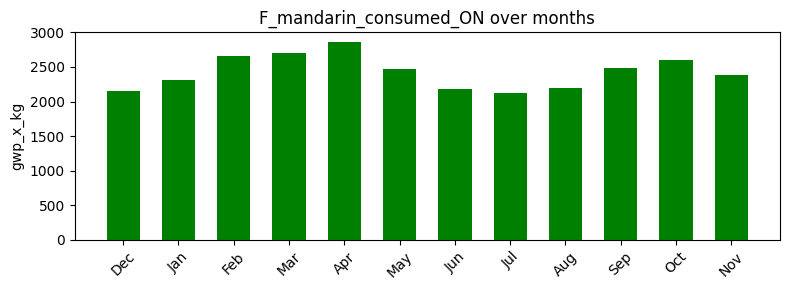

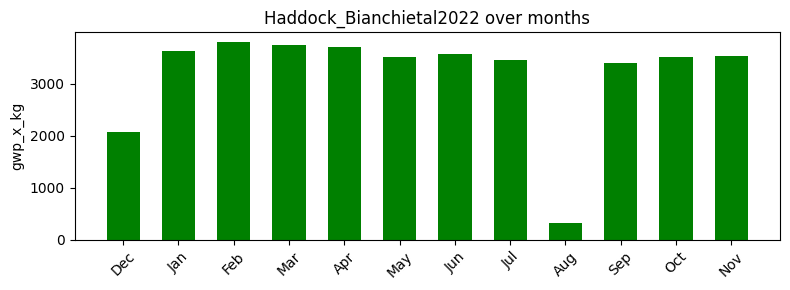

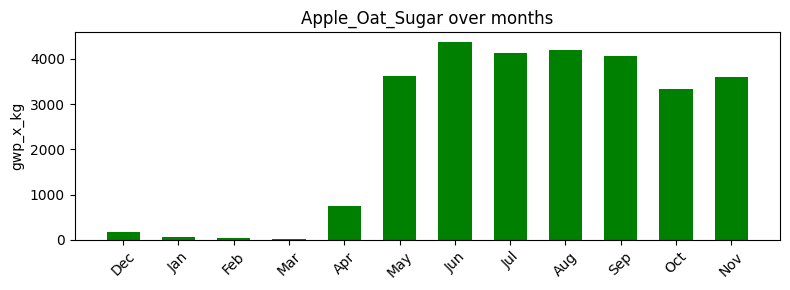

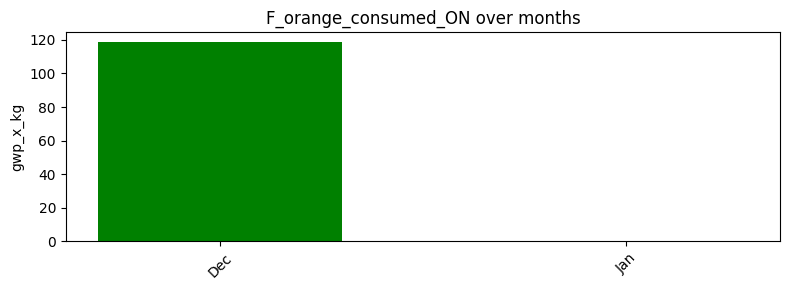

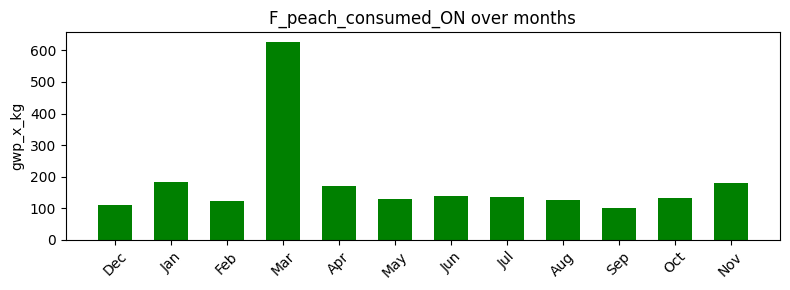

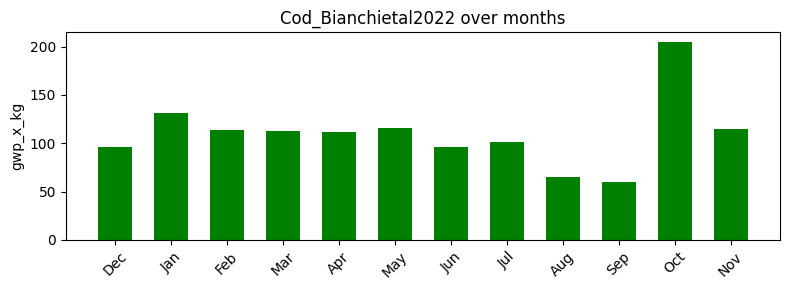

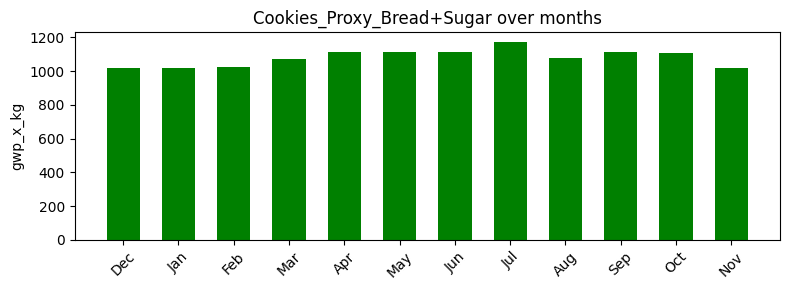

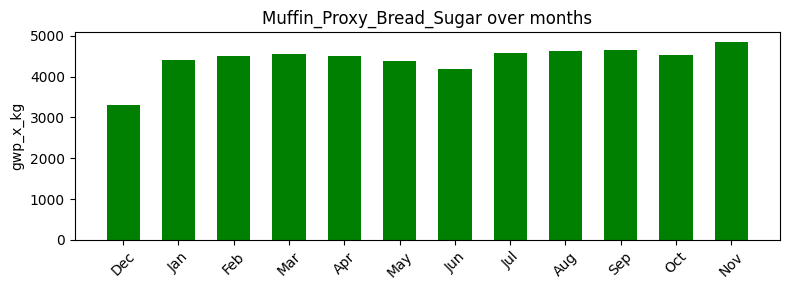

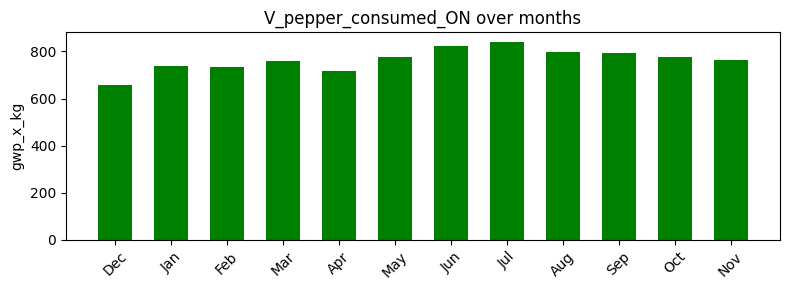

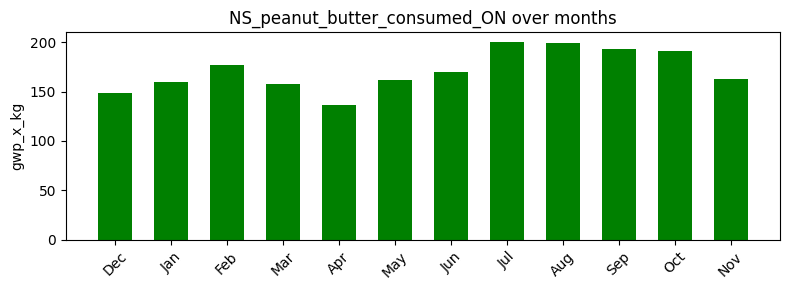

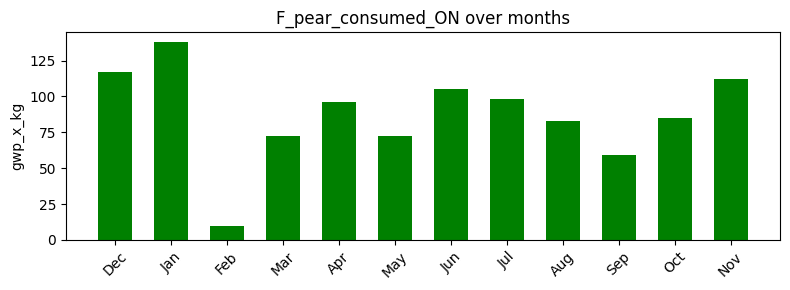

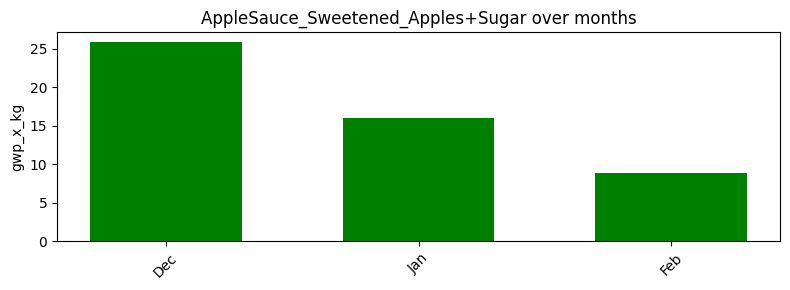

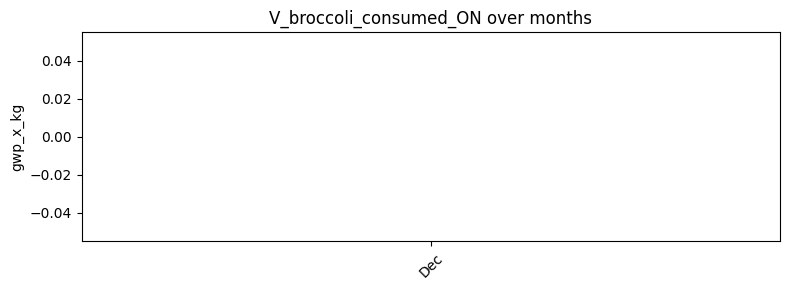

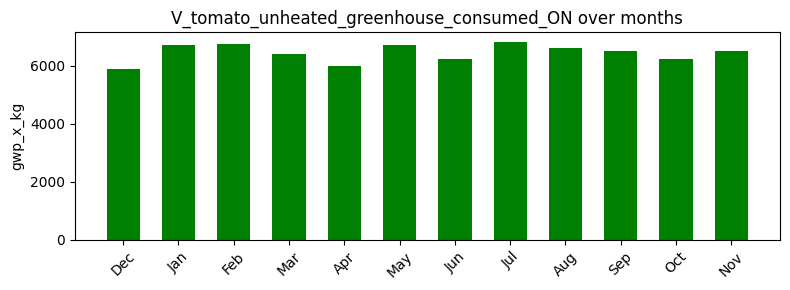

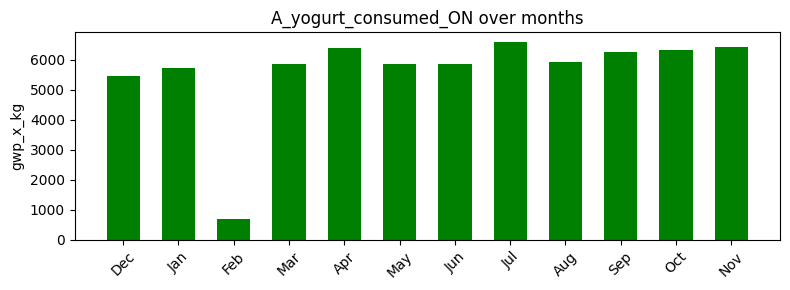

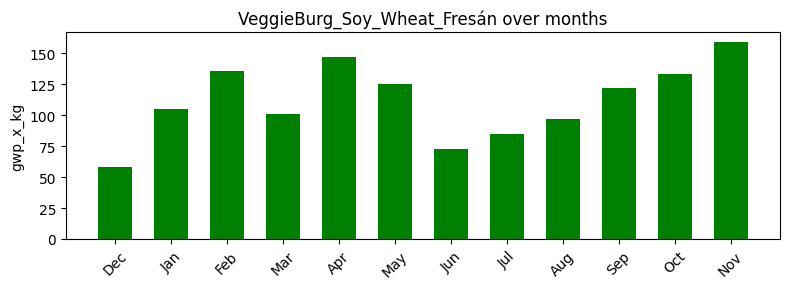

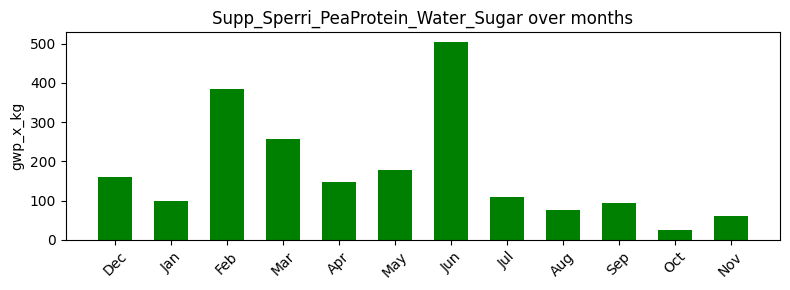

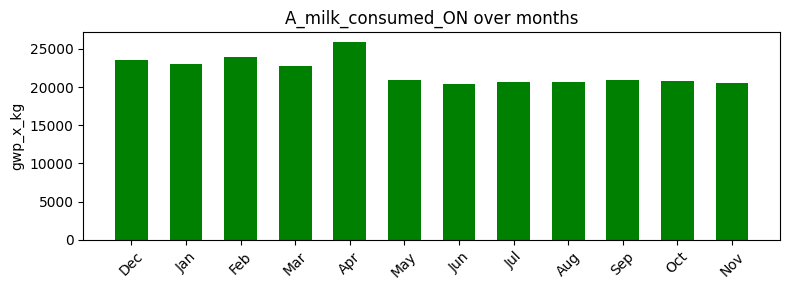

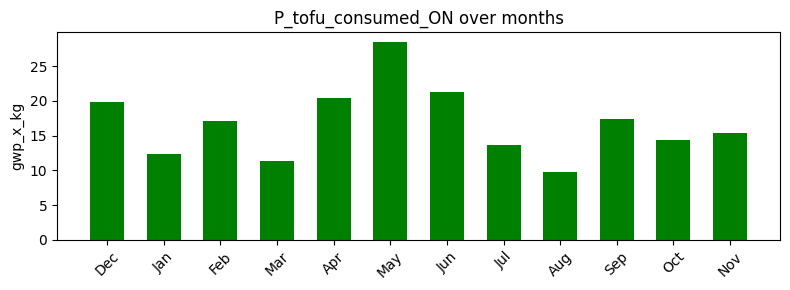

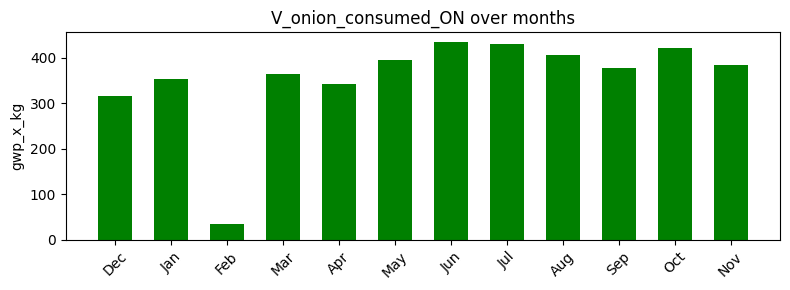

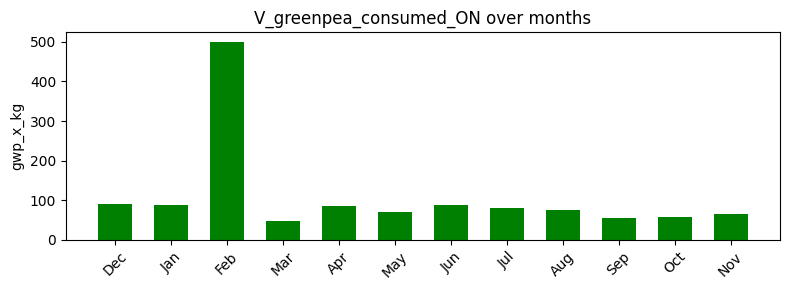

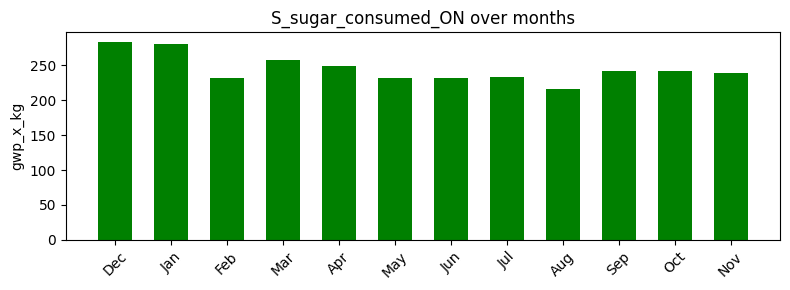

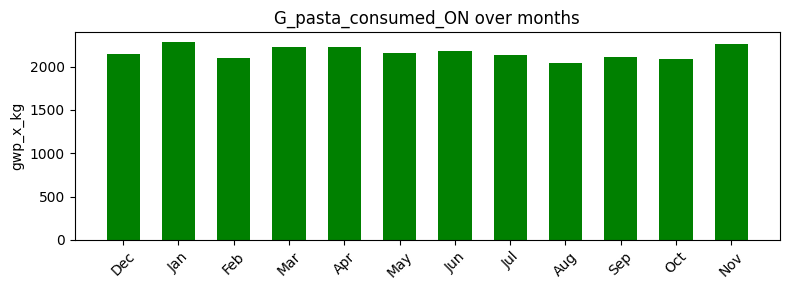

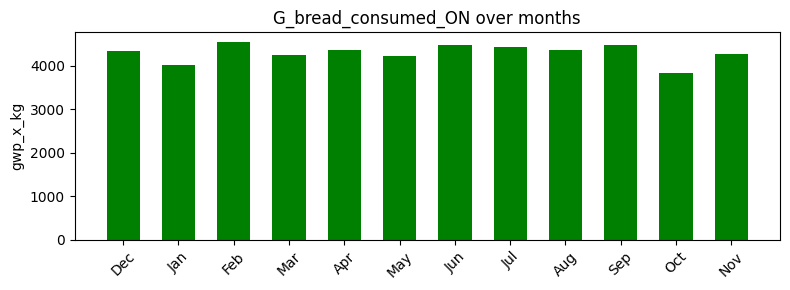

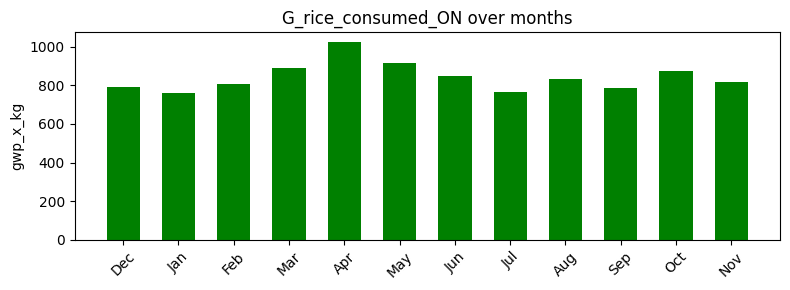

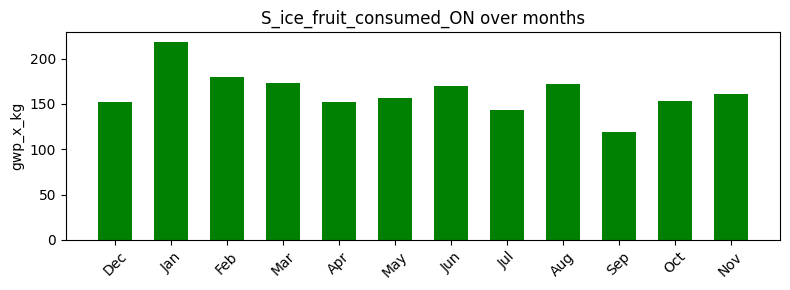

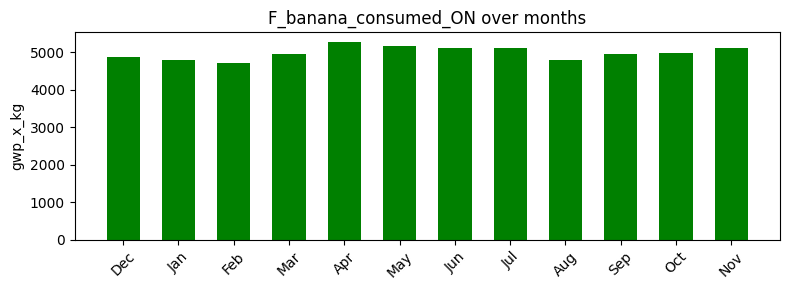

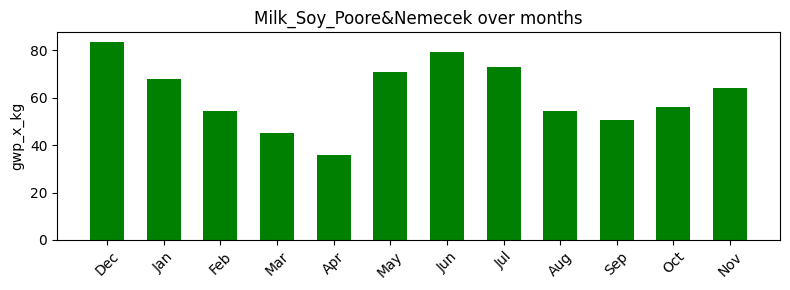

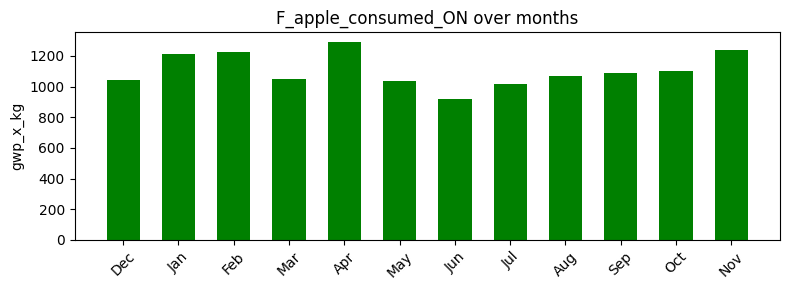

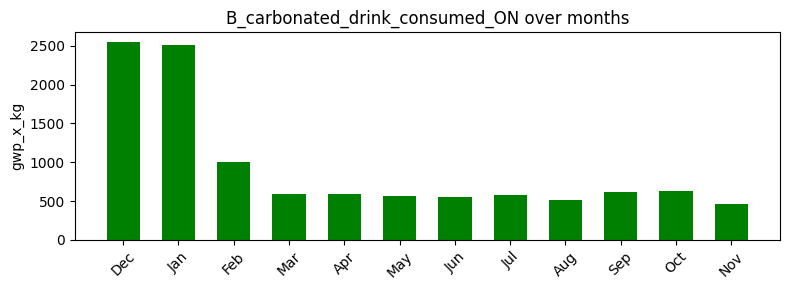

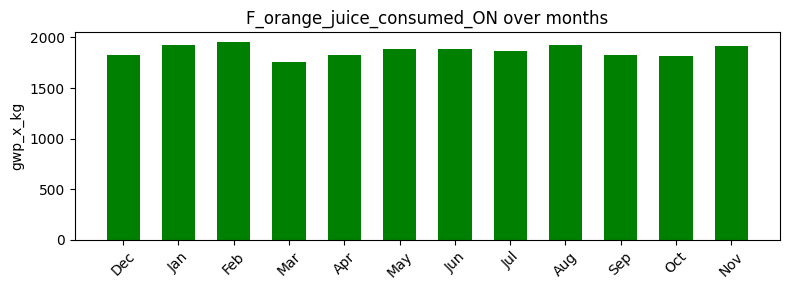

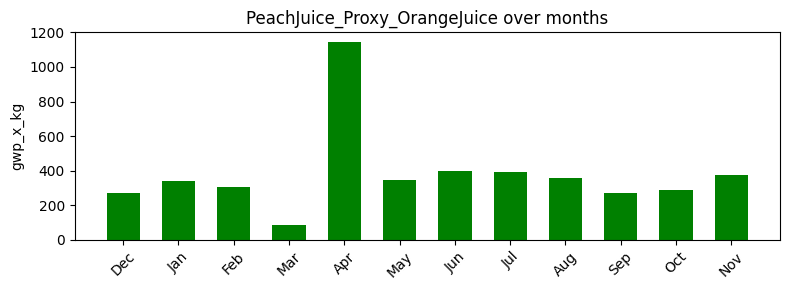

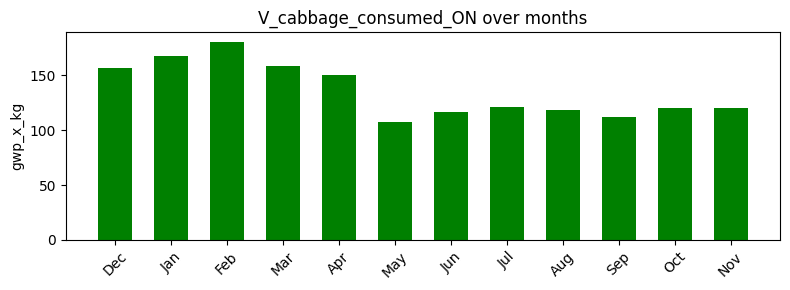

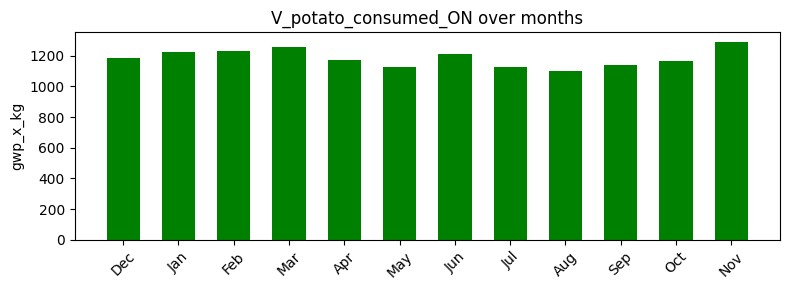

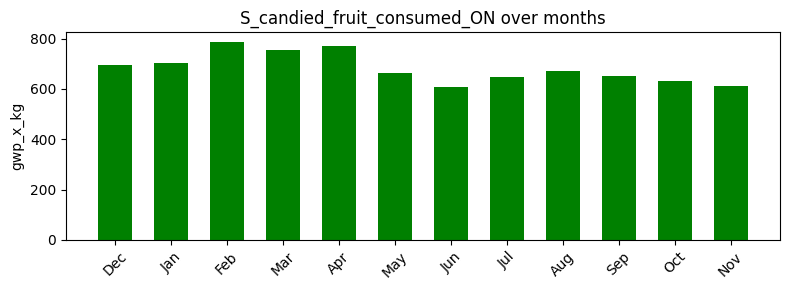

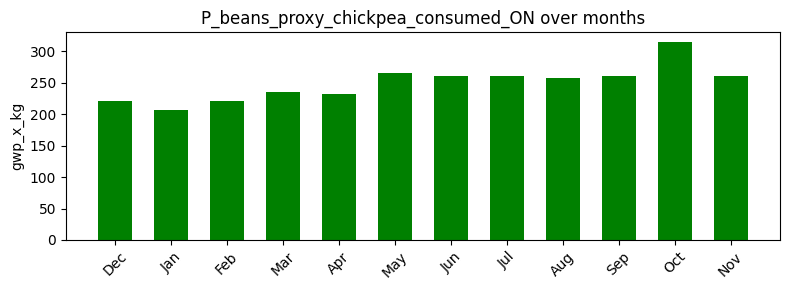

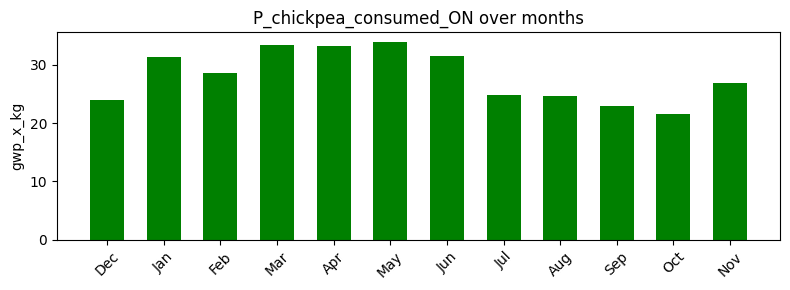

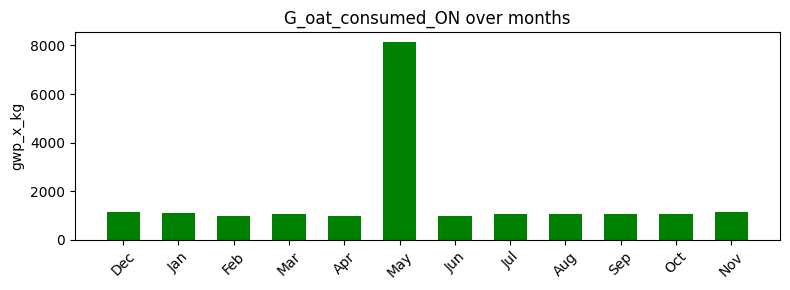

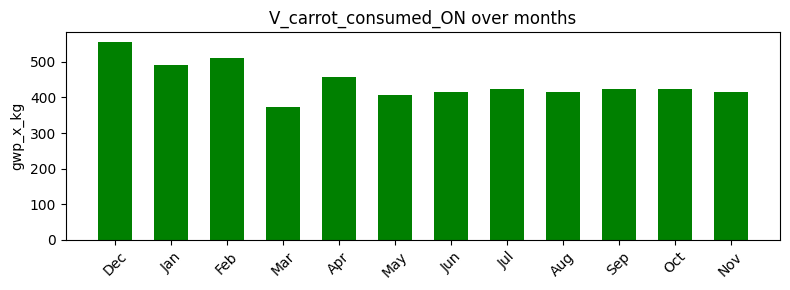

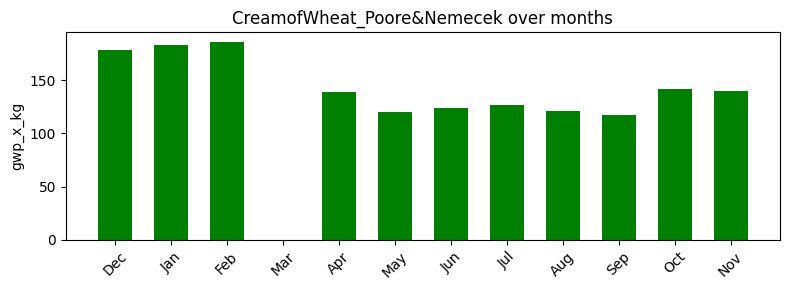

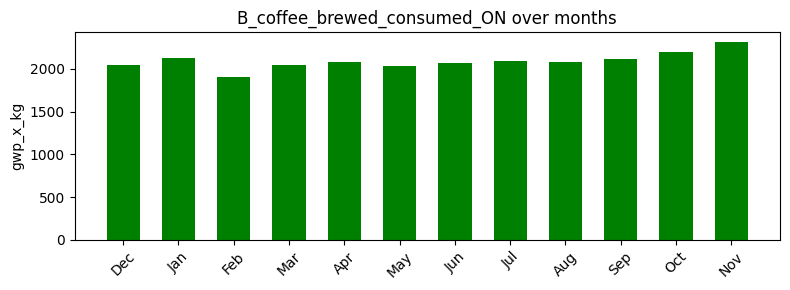

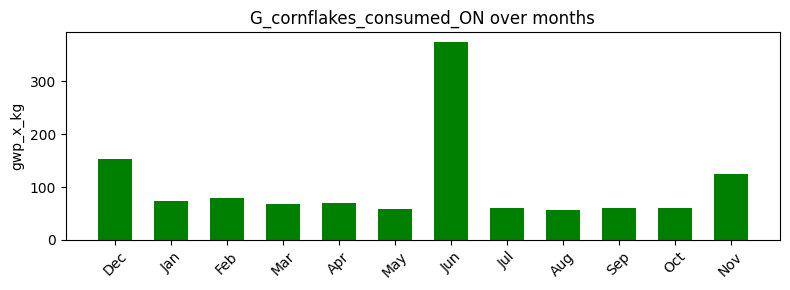

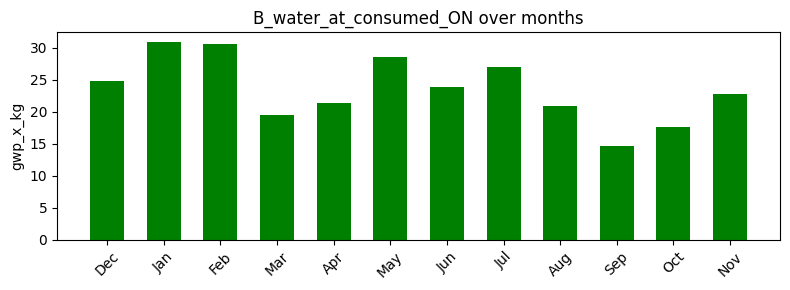

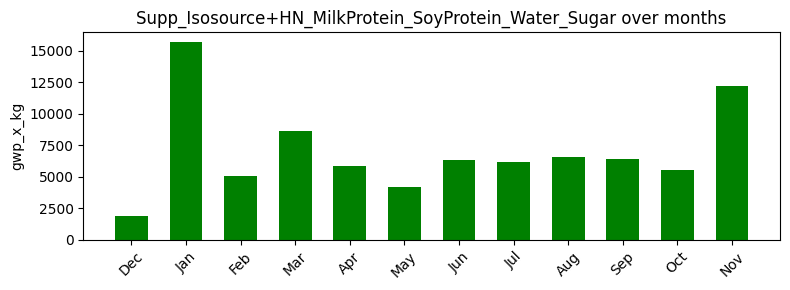

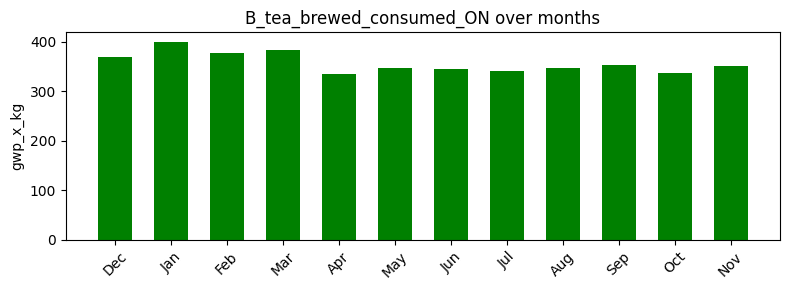

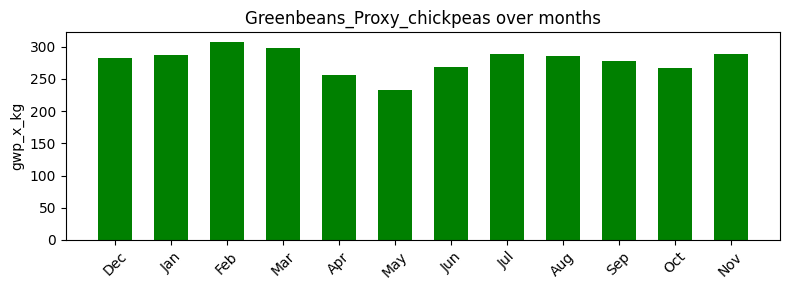

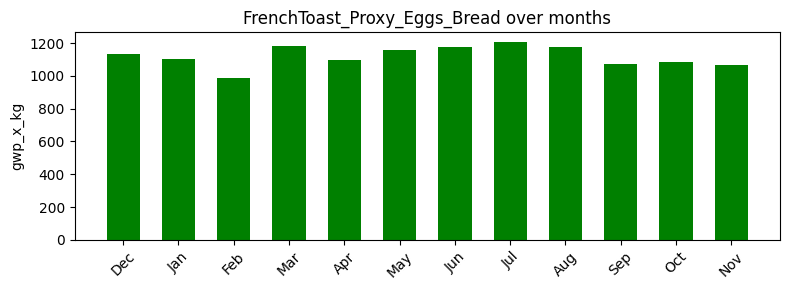

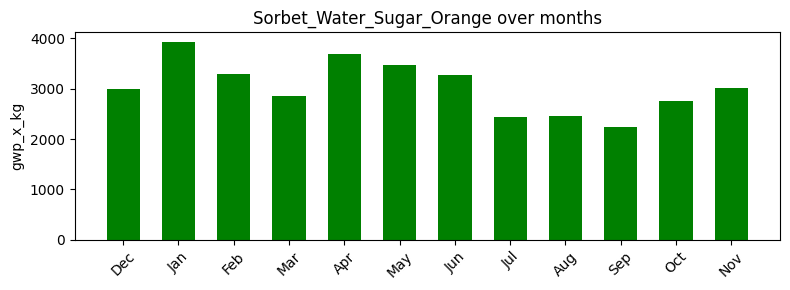

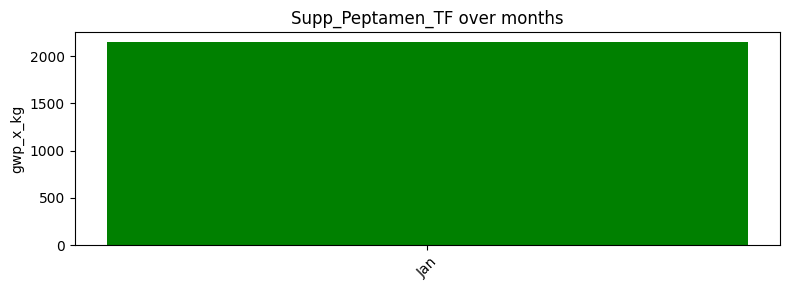

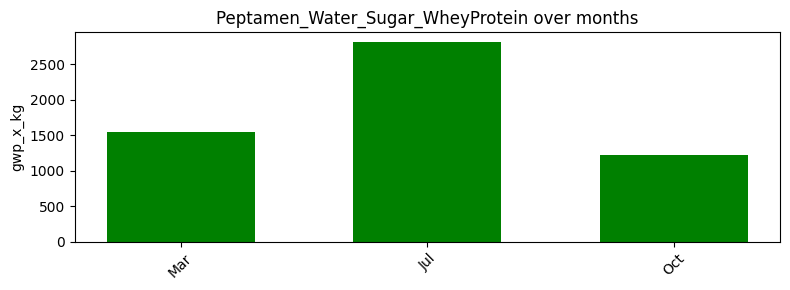

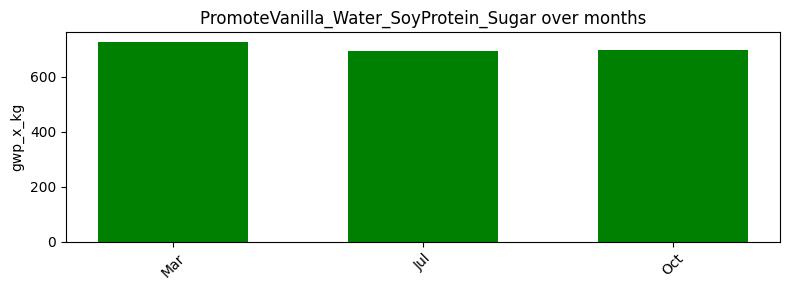

In [26]:
for name in monthly_df['food_items'].unique():
    plot_food(name, "gwp_x_kg") 

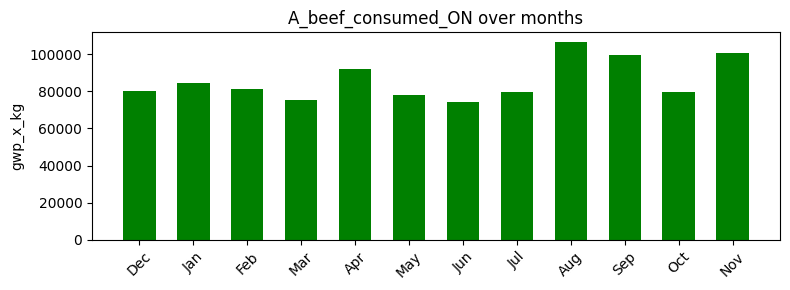

In [25]:
plot_food("A_beef_consumed_ON", "gwp_x_kg") 

In [27]:
len(monthly_df['food_items'].unique())

81

# new updated data

In [30]:
import pandas as pd

file_path = "export_result_nov18.xlsx"

months = [
    "Dec23","Jan24","Feb24","Mar24","Apr24","May24",
    "Jun24","Jul24","Aug24","Sep24","Oct24","Nov24"
]

xl = pd.ExcelFile(file_path)

for sheet in months:
    df = pd.read_excel(xl, sheet_name=sheet)

    # === TABLE 1 === (A–E → columns 0:5, dynamic length)
    # Detect where table 2 starts ("food_items" in col A)
    food_start = df.index[df.iloc[:, 0].astype(str).str.lower().eq("food_items")]
    if len(food_start) > 0:
        end_t1 = food_start[0]
    else:
        end_t1 = len(df)
    table1 = df.iloc[:end_t1, 0:5].dropna(how="all")

    # === TABLE 2 === (A–D → columns 0:4, starts at "food_items")
    if len(food_start) > 0:
        start_t2 = food_start[0]
        # find next blank row to determine end
        after = df.iloc[start_t2+1:, 0].isna()
        if after.any():
            end_t2 = after.idxmax()
        else:
            end_t2 = len(df)
        table2 = df.iloc[start_t2:end_t2, 0:4].dropna(how="all")
        table2.drop(table2.index[0], inplace=True)
    else:
        table2 = pd.DataFrame()
        table2.drop(table2.index[0], inplace=True)
        
    if table2.shape[1] == 4:
        table2.columns = ['food_items', 'quantity', 'sum_of_portionunitstandard_g', 'sum_of_portionunitstandard_kg']
       
    
    # === ANIMAL & SUMMARY (H–L: cols 7–12) ===
    animal = df.iloc[0:17, 7:12].dropna(how="all")
    animal_name = ['food_items', 'quantity', 'sum_of_portionunitstandard_g',
       'gwp_of_1_kg_food', 'gwp_x_kg']
    animal.columns = animal_name
    
    summary = df.iloc[18:23, 7:12].dropna(how="all")
    summary_name = ['variables', 'mass_kg', 'percentage_kg', 'gwp_total', 'percentage_gwp']
    summary.columns = summary_name

    # === ANIMAL_S & SUMMARY_S (O–S: cols 14–19) ===
    animal_s = df.iloc[0:17, 14:19].dropna(how="all")
    animal_s.columns = animal_name
    summary_s = df.iloc[18:23, 14:19].dropna(how="all")
    summary_s.columns = summary_name

    # === DROP completely empty columns (in case of blanks)
    table1 = table1.dropna(axis=1, how="all")
    table2 = table2.dropna(axis=1, how="all")
    if table2.shape[1] == 3:
        table2.columns = ['food_items', 'sum_of_portionunitstandard_g', 'sum_of_portionunitstandard_kg']
        #print(sheet)

    # === Assign to variables dynamically ===
    suffix = sheet[:3].lower()  # e.g., dec, jan, feb
    globals()[f"{suffix}_table1"]   = table1
    globals()[f"{suffix}_table2"]   = table2
    globals()[f"{suffix}_animal"]   = animal
    globals()[f"{suffix}_summary"]  = summary
    globals()[f"{suffix}_animal_s"] = animal_s
    globals()[f"{suffix}_summary_s"]= summary_s

    #print(f"✅ Extracted all tables for {sheet}")

print("All months processed and loaded into variables.")

All months processed and loaded into variables.


In [31]:
month_tables = {
    "Dec": dec_table1,
    "Jan": jan_table1,
    "Feb": feb_table1,
    "Mar": mar_table1,
    "Apr": apr_table1,
    "May": may_table1,
    "Jun": jun_table1,
    "Jul": jul_table1,
    "Aug": aug_table1,
    "Sep": sep_table1,
    "Oct": oct_table1,
    "Nov": nov_table1
}

# Step 2. Add month to each table and combine
df_list = []
for month, df in month_tables.items():
    temp = df.copy()
    temp["Month"] = month
    df_list.append(temp)

monthly_df = pd.concat(df_list, ignore_index=True)

# Step 3. Order months
month_order = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
monthly_df["Month"] = pd.Categorical(monthly_df["Month"], categories=month_order, ordered=True)

In [12]:
nn = pd.read_excel("/Users/saeed/Downloads/data_double_check.xlsx")
list(nn['food'])[:-4]

['A_pork_consumed_ON',
 'A_butter_consumed_ON',
 'O_margarine_consumed_ON',
 'Supp_Isosource+HN_MilkProtein_SoyProtein_Water_Sugar',
 'B_carbonated_drink_consumed_ON',
 'B_carbonated_drink_consumed_ON',
 'F_pear_consumed_ON',
 'A_yogurt_consumed_ON',
 'V_onion_consumed_ON',
 'V_greenpea_consumed_ON',
 'Pizza_Flatbread_Cheese_Flatbred_Tomato',
 'Supp_NovaSource_Water_Milk_SoyProtein',
 'F_peach_consumed_ON',
 'CreamofWheat_Poore&Nemecek',
 'PeachJuice_Proxy_OrangeJuice',
 'G_oat_consumed_ON',
 'Tuna_Bianchietal2022',
 'G_cornflakes_consumed_ON',
 'Supp_EnsureChocolate_Water_WheyProtein_Sugar',
 'A_salmon_consumed_ON',
 'Haddock_Bianchietal2022',
 'Pizza_Flatbread_Cheese_Flatbred_Tomato',
 'Apple_Oat_Sugar']

In [32]:
monthly_df[monthly_df.food_items=='A_salmon_consumed_ON']['gwp_x_kg']#.plot()

11     133.101003
89     108.653880
166    120.424717
244    110.464778
317     90.544900
393     94.166696
469     85.447222
546     93.261247
620     70.625022
696     85.112206
774     97.788492
847    104.126635
Name: gwp_x_kg, dtype: float64

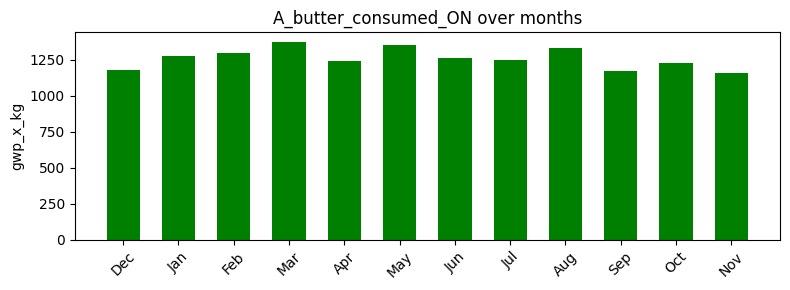

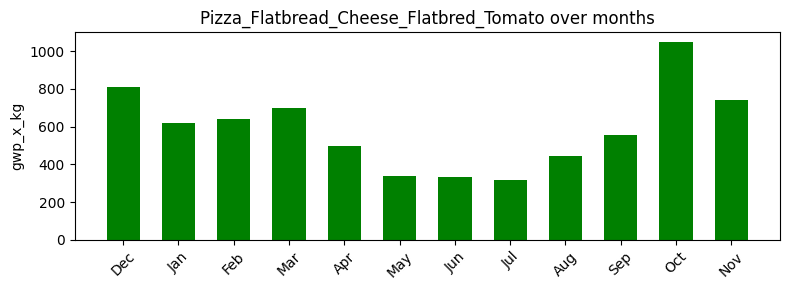

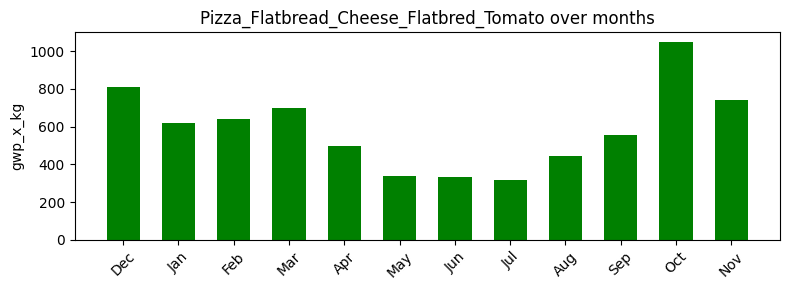

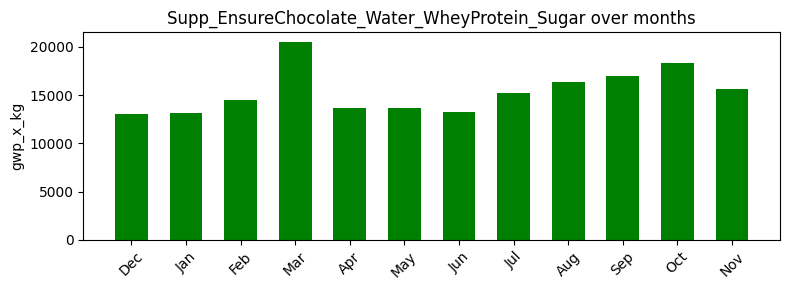

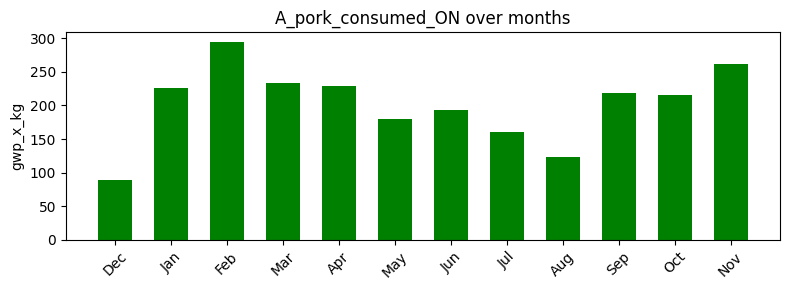

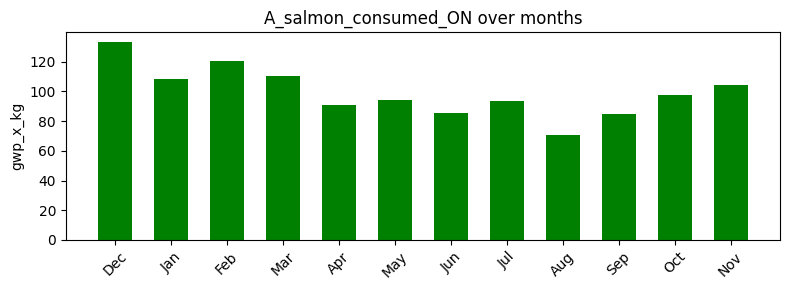

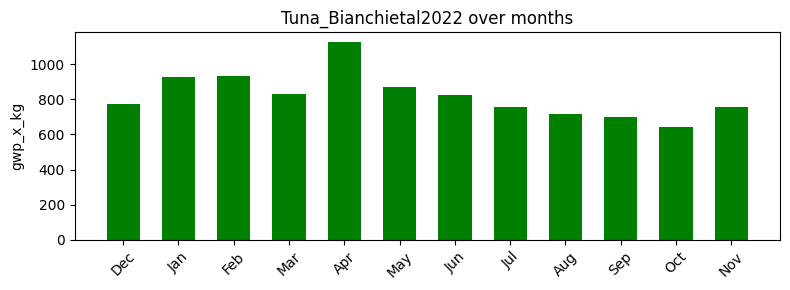

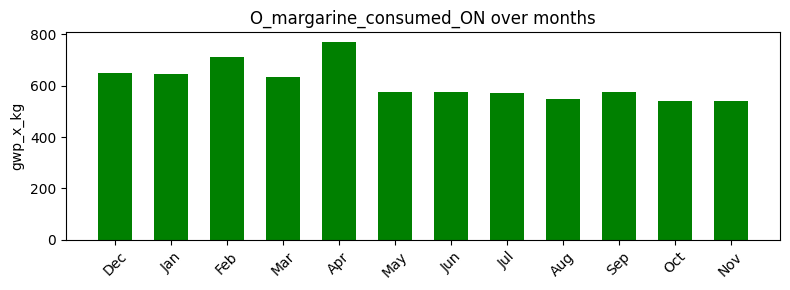

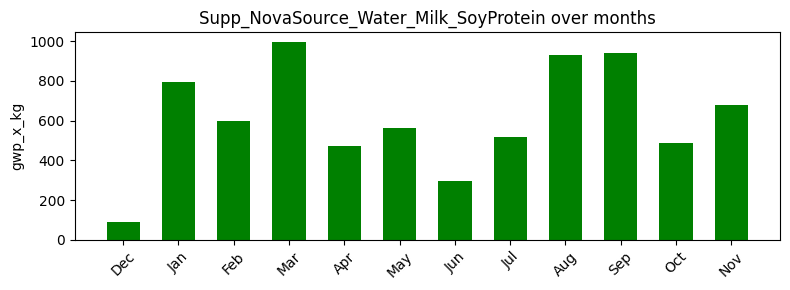

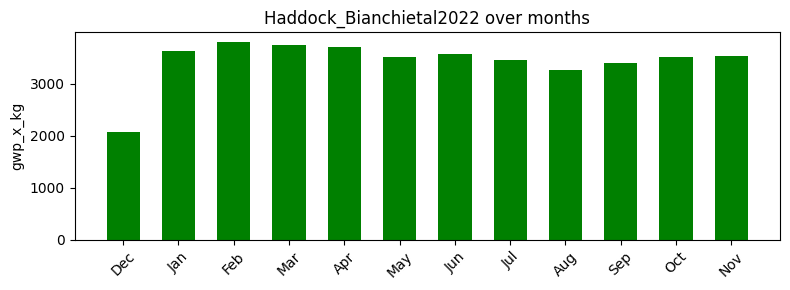

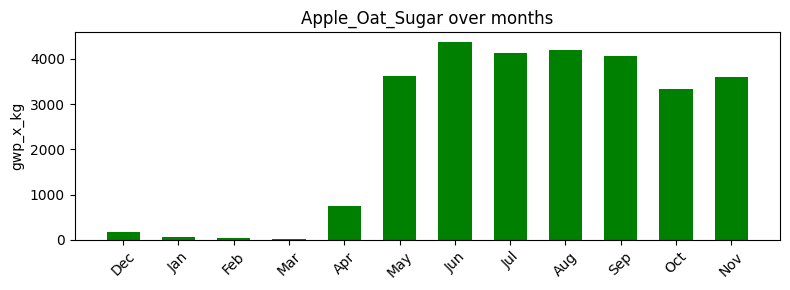

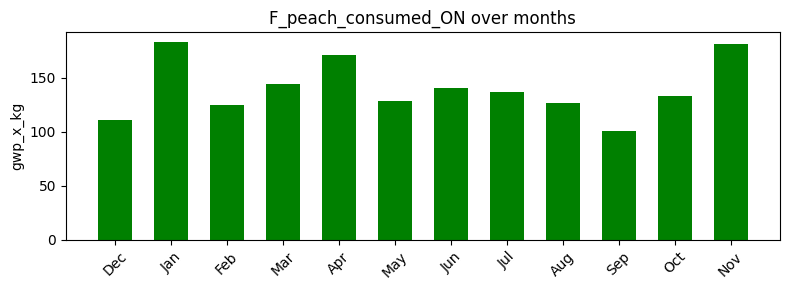

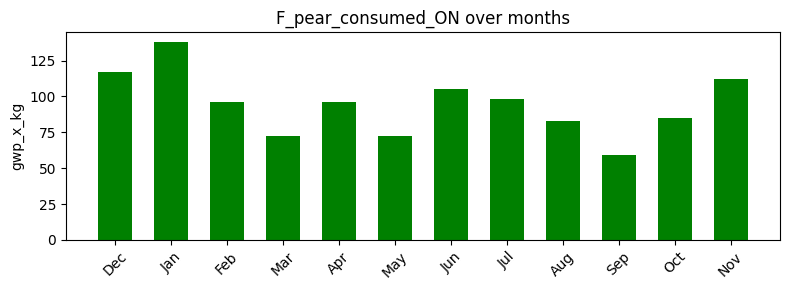

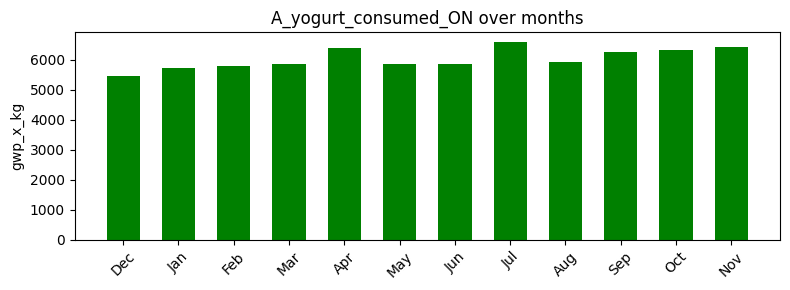

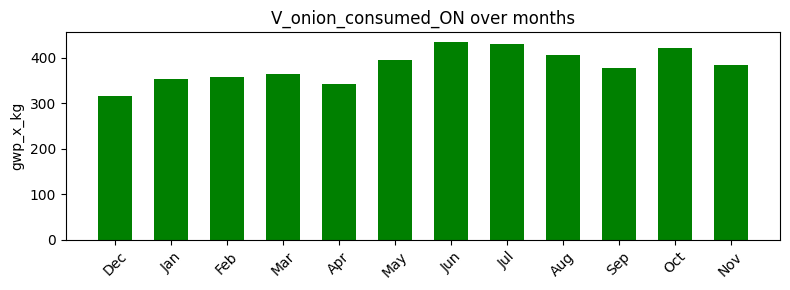

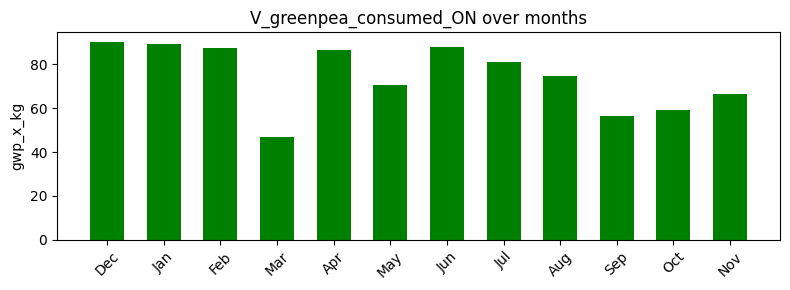

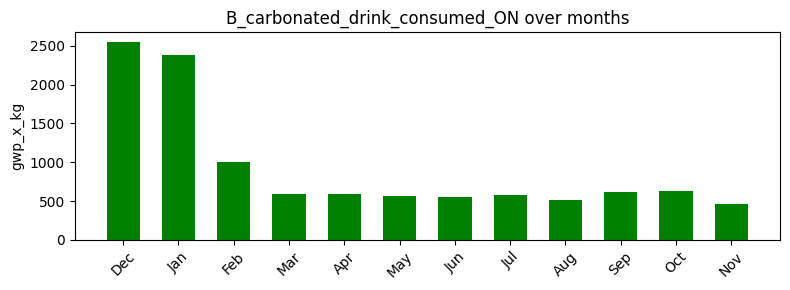

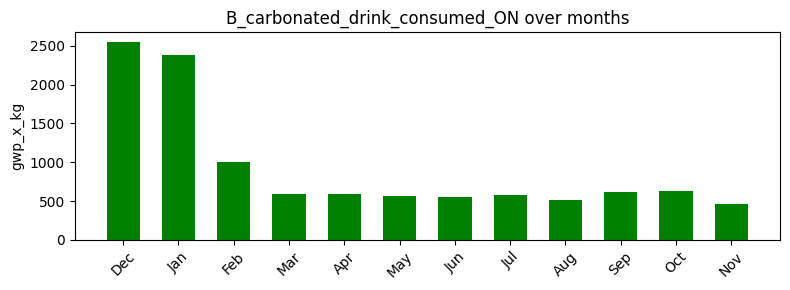

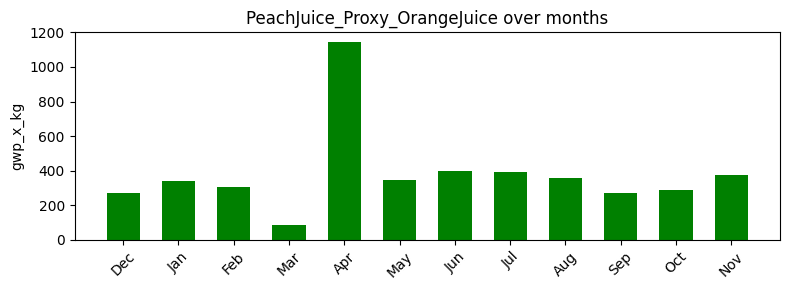

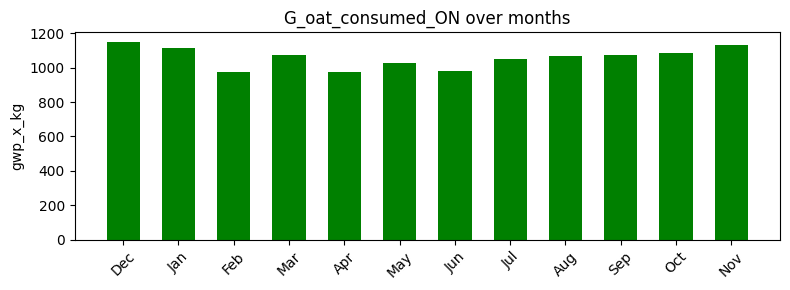

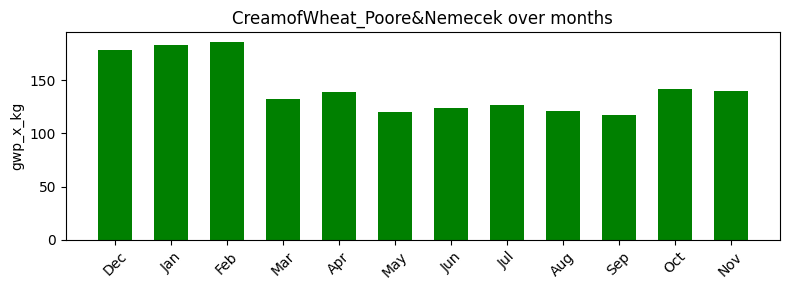

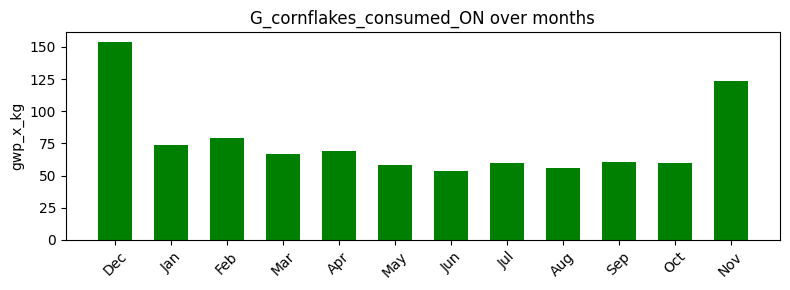

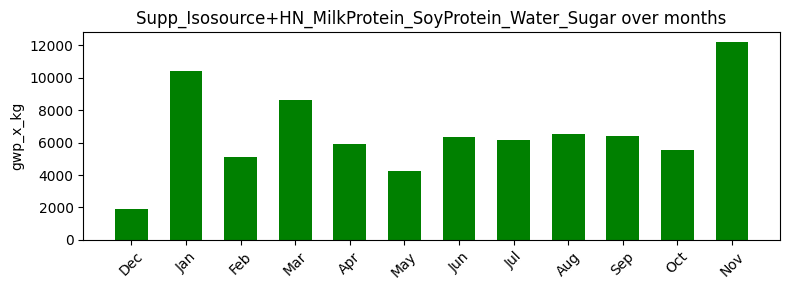

In [33]:
monthly_df['gwp_x_kg'] = monthly_df['gwp_x_kg'].astype(float)
for name in monthly_df['food_items'].unique():
    for n in list(nn['food'])[:-4]:
        if name == n:
            plot_food(name, "gwp_x_kg") 